<a href="https://colab.research.google.com/github/dr-lamia/udacity-bike-project/blob/main/project_template.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predict Bike Sharing Demand with AutoGluon Template

## Project: Predict Bike Sharing Demand with AutoGluon
This notebook is a template with each step that you need to complete for the project.

Please fill in your code where there are explicit `?` markers in the notebook. You are welcome to add more cells and code as you see fit.

Once you have completed all the code implementations, please export your notebook as a HTML file so the reviews can view your code. Make sure you have all outputs correctly outputted.

`File-> Export Notebook As... -> Export Notebook as HTML`

There is a writeup to complete as well after all code implememtation is done. Please answer all questions and attach the necessary tables and charts. You can complete the writeup in either markdown or PDF.

Completing the code template and writeup template will cover all of the rubric points for this project.

The rubric contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this notebook and also discuss the results in the writeup file.

## Step 1: Create an account with Kaggle

### Create Kaggle Account and download API key
Below is example of steps to get the API username and key. Each student will have their own username and key.

1. Open account settings.
![kaggle1.png](attachment:kaggle1.png)
![kaggle2.png](attachment:kaggle2.png)
2. Scroll down to API and click Create New API Token.
![kaggle3.png](attachment:kaggle3.png)
![kaggle4.png](attachment:kaggle4.png)
3. Open up `kaggle.json` and use the username and key.
![kaggle5.png](attachment:kaggle5.png)

## Step 2: Download the Kaggle dataset using the kaggle python library

### Open up Sagemaker Studio and use starter template

1. Notebook should be using a `ml.t3.medium` instance (2 vCPU + 4 GiB)
2. Notebook should be using kernal: `Python 3 (MXNet 1.8 Python 3.7 CPU Optimized)`

### Install packages

In [ ]:
!pip install -U pip
!pip install -U setuptools wheel
!pip install -U "mxnet<2.0.0" bokeh==2.0.1
!pip install autogluon --no-cache-dir
# Without --no-cache-dir, smaller aws instances may have trouble installing

  Using cached mxnet-1.9.1-py3-none-manylinux2014_x86_64.whl.metadata (3.4 kB)
  Using cached bokeh-2.0.1.tar.gz (8.6 MB)
  Preparing metadata (setup.py) ... done
  Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
  Using cached graphviz-0.8.4-py2.py3-none-any.whl.metadata (6.4 kB)
Using cached mxnet-1.9.1-py3-none-manylinux2014_x86_64.whl (49.1 MB)
Using cached graphviz-0.8.4-py2.py3-none-any.whl (16 kB)
Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.3 MB)
  DEPRECATION: Building 'bokeh' using the legacy setup.py bdist_wheel mechanism, which will be removed in a future version. pip 25.3 will enforce this behaviour change. A possible replacement is to use the standardized build interface by setting the `--use-pep517` option, (possibly combined with `--no-build-isolation`), or adding a `pyproject.toml` file to the source tree of 'bokeh'. Discussion can be found at https://github.com/pypa/pip/i

### Setup Kaggle API Key

In [ ]:
# create the .kaggle directory and an empty kaggle.json file
!mkdir -p /root/.kaggle
!touch /root/.kaggle/kaggle.json
!chmod 600 /root/.kaggle/kaggle.json

In [ ]:
# Fill in your user name and key from creating the kaggle account and API token file
import json
kaggle_username = "lamiaaelfadaly"
kaggle_key = "903b6f746ec7959d0b6d5727d5f99c57"

# Save API token the kaggle.json file
with open("/root/.kaggle/kaggle.json", "w") as f:
    f.write(json.dumps({"username": kaggle_username, "key": kaggle_key}))

### Download and explore dataset

### Go to the bike sharing demand competition and agree to the terms
![kaggle6.png](attachment:kaggle6.png)

In [ ]:
# Download the dataset, it will be in a .zip file so you'll need to unzip it as well.
!kaggle competitions download -c bike-sharing-demand
# If you already downloaded it you can use the -o command to overwrite the file
!unzip -o bike-sharing-demand.zip

  0% 0.00/189k [00:00<?, ?B/s]
100% 189k/189k [00:00<00:00, 121MB/s]
Archive:  bike-sharing-demand.zip
  inflating: sampleSubmission.csv    
  inflating: test.csv                
  inflating: train.csv               


In [ ]:
import pandas as pd
from autogluon.tabular import TabularPredictor

In [ ]:
# Create the train dataset in pandas by reading the csv
# Set the parsing of the datetime column so you can use some of the `dt` features in pandas later
train = pd.read_csv('train.csv', parse_dates=['datetime'])
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [ ]:
# Simple output of the train dataset to view some of the min/max/varition of the dataset features.
display(train.describe())

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2011-12-27 05:56:22.399411968,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
min,2011-01-01 00:00:00,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2011-07-02 07:15:00,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,2012-01-01 20:30:00,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,2012-07-01 12:45:00,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,2012-12-19 23:00:00,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000
std,NaN,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454


In [ ]:
# Create the test pandas dataframe in pandas by reading the csv, remember to parse the datetime!
test = pd.read_csv('test.csv', parse_dates=['datetime'])
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [ ]:
# Same thing as train and test dataset
submission = pd.read_csv('sampleSubmission.csv', parse_dates=['datetime'])
submission.head()

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


## Step 3: Train a model using AutoGluon’s Tabular Prediction

Requirements:
* We are prediting `count`, so it is the label we are setting.
* Ignore `casual` and `registered` columns as they are also not present in the test dataset.
* Use the `root_mean_squared_error` as the metric to use for evaluation.
* Set a time limit of 10 minutes (600 seconds).
* Use the preset `best_quality` to focus on creating the best model.

In [ ]:
from autogluon.tabular import TabularPredictor

train_for_fitting = train.drop(columns=['casual', 'registered'])
predictor = TabularPredictor(label='count', eval_metric='root_mean_squared_error').fit(train_for_fitting, time_limit=600, presets='best_quality')
predictor.leaderboard(extra_info=True, silent=True)


No path specified. Models will be saved in: "AutogluonModels/ag-20250607_075354"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.3.1
Python Version:     3.11.13
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Sun Mar 30 16:01:29 UTC 2025
CPU Count:          2
Memory Avail:       11.24 GB / 12.67 GB (88.7%)
Disk Space Avail:   66.50 GB / 107.72 GB (61.7%)
Presets specified: ['best_quality']
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
DyStack is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
	This is used to identify the optimal `num_stack_levels` value. Copies of AutoGluon will be

(_ray_fit pid=7729) [1000]	valid_set's rmse: 129.692
(_ray_fit pid=7971) [1000]	valid_set's rmse: 132.725 [repeated 5x across cluster] (Ray deduplicates logs by default. Set RAY_DEDUP_LOGS=0 to disable log deduplication, or see https://docs.ray.io/en/master/ray-observability/user-guides/configure-logging.html#log-deduplication for more options.)
(_ray_fit pid=8055) [1000]	valid_set's rmse: 128.154
(_ray_fit pid=8055) [2000]	valid_set's rmse: 126.702
(_ray_fit pid=8055) [3000]	valid_set's rmse: 126.147
(_ray_fit pid=8055) [4000]	valid_set's rmse: 125.904
(_ray_fit pid=8055) [5000]	valid_set's rmse: 125.681 [repeated 2x across cluster]
(_ray_fit pid=8129) [4000]	valid_set's rmse: 133.013 [repeated 5x across cluster]


(_ray_fit pid=8055) 	Ran out of time, early stopping on iteration 7574. Best iteration is:
(_ray_fit pid=8055) 	[7106]	valid_set's rmse: 125.339


(_ray_fit pid=8129) [7000]	valid_set's rmse: 132.416 [repeated 3x across cluster]


(_ray_fit pid=8129) 	Ran out of time, early stopping on iteration 8361. Best iteration is:
(_ray_fit pid=8129) 	[7329]	valid_set's rmse: 132.331


(_ray_fit pid=8333) [1000]	valid_set's rmse: 137.712 [repeated 2x across cluster]
(_ray_fit pid=8333) [4000]	valid_set's rmse: 135.344 [repeated 3x across cluster]
(_ray_fit pid=8427) [2000]	valid_set's rmse: 138.865 [repeated 3x across cluster]


(_ray_fit pid=8333) 	Ran out of time, early stopping on iteration 8098. Best iteration is:
(_ray_fit pid=8333) 	[6258]	valid_set's rmse: 135.071


(_ray_fit pid=8427) [5000]	valid_set's rmse: 137.961 [repeated 6x across cluster]


(_dystack pid=7515) 	-131.9758	 = Validation score   (-root_mean_squared_error)
(_dystack pid=7515) 	95.37s	 = Training   runtime
(_dystack pid=7515) 	16.79s	 = Validation runtime
(_dystack pid=7515) Fitting model: WeightedEnsemble_L2 ... Training model for up to 141.62s of the 29.79s of remaining time.
(_dystack pid=7515) 	Ensemble Weights: {'KNeighborsDist_BAG_L1': 1.0}
(_dystack pid=7515) 	-89.9469	 = Validation score   (-root_mean_squared_error)
(_dystack pid=7515) 	0.07s	 = Training   runtime
(_dystack pid=7515) 	0.0s	 = Validation runtime
(_dystack pid=7515) Fitting 106 L2 models, fit_strategy="sequential" ...
(_dystack pid=7515) Fitting model: LightGBMXT_BAG_L2 ... Training model for up to 29.71s of the 28.95s of remaining time.
(_dystack pid=7515) 	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy (2 workers, per: cpus=1, gpus=0, memory=0.12%)


(_ray_fit pid=8618) [1000]	valid_set's rmse: 71.4318
(_ray_fit pid=8617) [1000]	valid_set's rmse: 70.3611
(_ray_fit pid=8756) [1000]	valid_set's rmse: 77.4878
(_ray_fit pid=8797) [1000]	valid_set's rmse: 73.7739
(_ray_fit pid=8915) [1000]	valid_set's rmse: 76.4032
(_ray_fit pid=8935) [1000]	valid_set's rmse: 77.0022


(_ray_fit pid=8915) 	Ran out of time, early stopping on iteration 1735. Best iteration is:
(_ray_fit pid=8915) 	[1509]	valid_set's rmse: 76.2439


(_ray_fit pid=9058) [1000]	valid_set's rmse: 73.4134
(_ray_fit pid=9119) [1000]	valid_set's rmse: 75.8094


(_dystack pid=7515) 	-74.3067	 = Validation score   (-root_mean_squared_error)
(_dystack pid=7515) 	54.05s	 = Training   runtime
(_dystack pid=7515) 	4.39s	 = Validation runtime
(_dystack pid=7515) Fitting model: WeightedEnsemble_L3 ... Training model for up to 141.62s of the -30.70s of remaining time.
(_dystack pid=7515) 	Ensemble Weights: {'LightGBMXT_BAG_L2': 0.947, 'KNeighborsDist_BAG_L1': 0.053}
(_dystack pid=7515) 	-74.2555	 = Validation score   (-root_mean_squared_error)
(_dystack pid=7515) 	0.07s	 = Training   runtime
(_dystack pid=7515) 	0.0s	 = Validation runtime
(_dystack pid=7515) AutoGluon training complete, total runtime = 172.54s ... Best model: WeightedEnsemble_L3 | Estimated inference throughput: 57.1 rows/s (1210 batch size)
(_dystack pid=7515) TabularPredictor saved. To load, use: predictor = TabularPredictor.load("/content/AutogluonModels/ag-20250607_075354/ds_sub_fit/sub_fit_ho")
(_dystack pid=7515) Deleting DyStack predictor artifacts (clean_up_fits=True) ...
Lead

,model,score_val,eval_metric,pred_time_val,fit_time,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order,...,hyperparameters,hyperparameters_fit,ag_args_fit,features,compile_time,child_hyperparameters,child_hyperparameters_fit,child_ag_args_fit,ancestors,descendants
0,WeightedEnsemble_L3,-55.073418,root_mean_squared_error,29.889292,378.378056,0.000967,0.054132,3,True,10,...,"{'use_orig_features': False, 'valid_stacker': ...",{},"{'max_memory_usage_ratio': 1.0, 'max_time_limi...","[LightGBMXT_BAG_L2, LightGBM_BAG_L2]",None,"{'ensemble_size': 25, 'subsample_size': 1000000}",{'ensemble_size': 21},"{'max_memory_usage_ratio': 1.0, 'max_time_limi...","[RandomForestMSE_BAG_L1, KNeighborsUnif_BAG_L1...",[]
1,LightGBM_BAG_L2,-55.135441,root_mean_squared_error,20.355031,288.847077,0.454325,44.698057,2,True,9,...,"{'use_orig_features': True, 'valid_stacker': T...",{},"{'max_memory_usage_ratio': 1.0, 'max_time_limi...","[LightGBMXT_BAG_L1, windspeed, datetime.dayofw...",None,{'learning_rate': 0.05},{'num_boost_round': 198},"{'max_memory_usage_ratio': 1.0, 'max_time_limi...","[RandomForestMSE_BAG_L1, KNeighborsUnif_BAG_L1...",[WeightedEnsemble_L3]
2,LightGBMXT_BAG_L2,-60.553773,root_mean_squared_error,29.434001,333.625867,9.533295,89.476847,2,True,8,...,"{'use_orig_features': True, 'valid_stacker': T...",{},"{'max_memory_usage_ratio': 1.0, 'max_time_limi...","[LightGBMXT_BAG_L1, windspeed, datetime.dayofw...",None,"{'learning_rate': 0.05, 'extra_trees': True}",{'num_boost_round': 2342},"{'max_memory_usage_ratio': 1.0, 'max_time_limi...","[RandomForestMSE_BAG_L1, KNeighborsUnif_BAG_L1...",[WeightedEnsemble_L3]
3,KNeighborsDist_BAG_L1,-84.125061,root_mean_squared_error,0.058639,0.033659,0.058639,0.033659,1,True,2,...,"{'use_orig_features': True, 'valid_stacker': T...",{},"{'max_memory_usage_ratio': 1.0, 'max_time_limi...","[weather, datetime.month, humidity, datetime.d...",None,{'weights': 'distance'},{},"{'max_memory_usage_ratio': 1.0, 'max_time_limi...",[],"[WeightedEnsemble_L3, LightGBM_BAG_L2, LightGB..."
4,WeightedEnsemble_L2,-84.125061,root_mean_squared_error,0.059303,0.059269,0.000664,0.025610,2,True,7,...,"{'use_orig_features': False, 'valid_stacker': ...",{},"{'max_memory_usage_ratio': 1.0, 'max_time_limi...",[KNeighborsDist_BAG_L1],None,"{'ensemble_size': 25, 'subsample_size': 1000000}",{'ensemble_size': 1},"{'max_memory_usage_ratio': 1.0, 'max_time_limi...",[KNeighborsDist_BAG_L1],[]
5,KNeighborsUnif_BAG_L1,-101.546199,root_mean_squared_error,0.056647,0.039023,0.056647,0.039023,1,True,1,...,"{'use_orig_features': True, 'valid_stacker': T...",{},"{'max_memory_usage_ratio': 1.0, 'max_time_limi...","[weather, datetime.month, humidity, datetime.d...",None,{'weights': 'uniform'},{},"{'max_memory_usage_ratio': 1.0, 'max_time_limi...",[],"[WeightedEnsemble_L3, LightGBMXT_BAG_L2, Light..."
6,RandomForestMSE_BAG_L1,-116.548359,root_mean_squared_error,0.693810,21.158224,0.693810,21.158224,1,True,5,...,"{'use_orig_features': True, 'valid_stacker': T...",{},"{'max_memory_usage_ratio': 1.0, 'max_time_limi...","[workingday, holiday, weather, datetime.month,...",None,"{'n_estimators': 300, 'max_leaf_nodes': 15000,...",{'n_estimators': 300},"{'max_memory_usage_ratio': 1.0, 'max_time_limi...",[],"[WeightedEnsemble_L3, LightGBMXT_BAG_L2, Light..."
7,LightGBM_BAG_L1,-131.054162,root_mean_squared_error,1.962915,48.927705,1.962915,48.927705,1,True,4,...,"{'use_orig_features': True, 'valid_stacker': T...",{},"{'max_memory_usage_ratio': 1.0, 'max_time_limi...","[workingday, holiday, weather, datetime.month,...",None,{'learning_rate': 0.05},{'num_boost_round': 1063},"{'max_memory_usage_ratio': 1.0, 'max_time_limi...",[],"[WeightedEnsemble_L3, LightGBMXT_BAG_L2, Light..."
8,LightGBMXT_BAG_L1,-131.460909,root_mean_squared_error,16.840123,92.087695,16.840123,92.087695,1,True,3,...,"{'use_orig_features': True, 'valid_stacker': T...",{},"{'max_memory_usage_ratio': 1.0, 'max_time_limi...","[workingday, holiday, weather, datetime.month,...",

### Review AutoGluon's training run with ranking of models that did the best.

In [ ]:
predictor.leaderboard(silent=True)


,model,score_val,eval_metric,pred_time_val,fit_time,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,WeightedEnsemble_L3,-55.073418,root_mean_squared_error,29.889292,378.378056,0.000967,0.054132,3,True,10
1,LightGBM_BAG_L2,-55.135441,root_mean_squared_error,20.355031,288.847077,0.454325,44.698057,2,True,9
2,LightGBMXT_BAG_L2,-60.553773,root_mean_squared_error,29.434001,333.625867,9.533295,89.476847,2,True,8
3,KNeighborsDist_BAG_L1,-84.125061,root_mean_squared_error,0.058639,0.033659,0.058639,0.033659,1,True,2
4,WeightedEnsemble_L2,-84.125061,root_mean_squared_error,0.059303,0.059269,0.000664,0.025610,2,True,7
5,KNeighborsUnif_BAG_L1,-101.546199,root_mean_squared_error,0.056647,0.039023,0.056647,0.039023,1,True,1
6,RandomForestMSE_BAG_L1,-116.548359,root_mean_squared_error,0.693810,21.158224,0.693810,21.158224,1,True,5
7,LightGBM_BAG_L1,-131.054162,root_mean_squared_error,1.962915,48.927705,1.962915,48.927705,1,True,4
8,LightGBMXT_BAG_L1,-131.460909,root_mean_squared_error,16.840123,92.087695,16.840123,92.087695,1,True,3
9,CatBoost_BAG_L1,-131.530135,root_mean_squared_error,0.288572,81.902715,0.288572,81.902715,1,True,6


In [ ]:
import numpy as np
np.bool8 = np.bool_


In [ ]:
predictor.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                    model   score_val              eval_metric  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0     WeightedEnsemble_L3  -55.073418  root_mean_squared_error      29.889292  378.378056                0.000967           0.054132            3       True         10
1         LightGBM_BAG_L2  -55.135441  root_mean_squared_error      20.355031  288.847077                0.454325          44.698057            2       True          9
2       LightGBMXT_BAG_L2  -60.553773  root_mean_squared_error      29.434001  333.625867                9.533295          89.476847            2       True          8
3   KNeighborsDist_BAG_L1  -84.125061  root_mean_squared_error       0.058639    0.033659                0.058639           0.033659            1       True          2
4     WeightedEnsemble_L2  -84.125061  root_mean_squared_error       0.059303    0.059269         

/usr/local/lib/python3.11/dist-packages/autogluon/core/utils/plots.py:169: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBMXT_BAG_L2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2': 'StackerEnsembleModel_LGB',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif_BAG_L1': np.float64(-101.54619908446061),
  'KNeighborsDist_BAG_L1': np.float64(-84.12506123181602),
  'LightGBMXT_BAG_L1': np.float64(-131.46090891834504),
  'LightGBM_BAG_L1': np.float64(-131.054161598899),
  'RandomForestMSE_BAG_L1': np.float64(-116.54835939455667),
  'CatBoost_BAG_L1': np.float64(-131.53013514434335),
  'WeightedEnsemble_L2': np.float64(-84.12506123181602),
  'LightGBMXT_BAG_L2': np.float64(-60.5537726

### Create predictions from test dataset

In [ ]:
predictions = predictor.predict(test)
predictions.head()

,count
0,37.128208
1,45.447319
2,49.520077
3,52.094143
4,53.168678


#### NOTE: Kaggle will reject the submission if we don't set everything to be > 0.

In [ ]:
# Describe the `predictions` series to see if there are any negative values
predictions.describe()


,count
count,6493.000000
mean,99.312721
std,89.598244
min,-6.570549
25%,15.990982
50%,62.971382
75%,172.467972
max,365.552368


In [ ]:
# How many negative values do we have?
(predictions < 0).sum()

np.int64(6)

In [ ]:
# Set them to zero
predictions[predictions < 0] = 0


### Set predictions to submission dataframe, save, and submit

In [ ]:
submission["count"] = predictions
submission.to_csv("submission.csv", index=False)

In [ ]:
!kaggle competitions submit -c bike-sharing-demand -f submission.csv -m "first raw submission"

100% 188k/188k [00:00<00:00, 331kB/s]
Successfully submitted to Bike Sharing Demand

#### View submission via the command line or in the web browser under the competition's page - `My Submissions`

In [ ]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                     date                        description                        status                     publicScore  privateScore  
---------------------------  --------------------------  ---------------------------------  -------------------------  -----------  ------------  
submission.csv               2025-06-07 08:11:51.227000  first raw submission               SubmissionStatus.COMPLETE  1.84770      1.84770       
submission_new_hpo.csv       2025-06-06 17:13:27.727000  new features with hyperparameters  SubmissionStatus.COMPLETE  0.52077      0.52077       
submission_new_features.csv  2025-06-06 16:56:45.887000  new features                       SubmissionStatus.COMPLETE  0.61940      0.61940       
submission.csv               2025-06-06 16:26:04.753000  first raw submission               SubmissionStatus.COMPLETE  1.85717      1.85717       


#### Initial score of `?`

## Step 4: Exploratory Data Analysis and Creating an additional feature
* Any additional feature will do, but a great suggestion would be to separate out the datetime into hour, day, or month parts.

array([[<Axes: title={'center': 'datetime'}>,
        <Axes: title={'center': 'season'}>,
        <Axes: title={'center': 'holiday'}>],
       [<Axes: title={'center': 'workingday'}>,
        <Axes: title={'center': 'weather'}>,
        <Axes: title={'center': 'temp'}>],
       [<Axes: title={'center': 'atemp'}>,
        <Axes: title={'center': 'humidity'}>,
        <Axes: title={'center': 'windspeed'}>],
       [<Axes: title={'center': 'casual'}>,
        <Axes: title={'center': 'registered'}>,
        <Axes: title={'center': 'count'}>]], dtype=object)

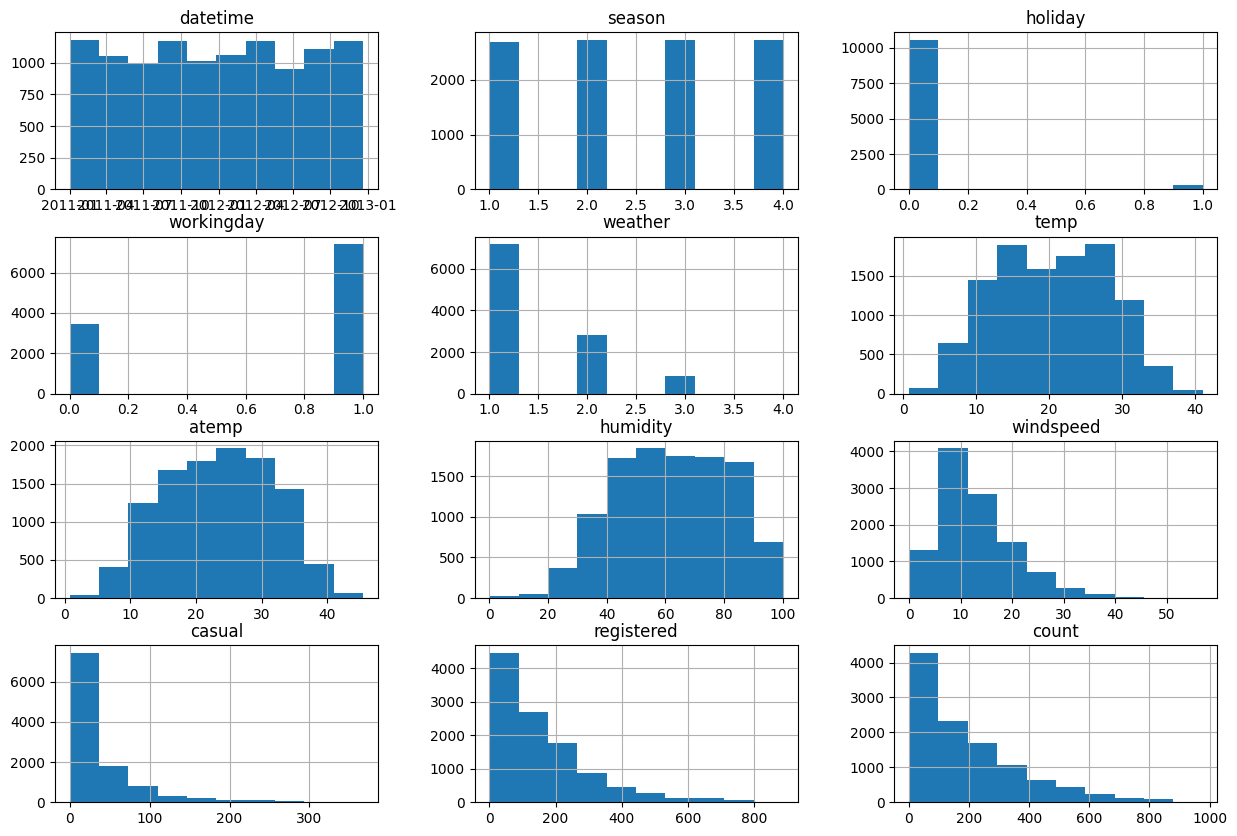

In [ ]:
# Create a histogram of all features to show the distribution of each one relative to the data. This is part of the exploritory data analysis
train.hist(figsize=(15, 10))

In [ ]:
# create a new feature
train['hour'] = train['datetime'].dt.hour
test['hour'] = test['datetime'].dt.hour

## Make category types for these so models know they are not just numbers
* AutoGluon originally sees these as ints, but in reality they are int representations of a category.
* Setting the dtype to category will classify these as categories in AutoGluon.

In [ ]:
train["season"] = train["season"].astype('category')
train["weather"] = train["weather"].astype('category')
test["season"] = test["season"].astype('category')
test["weather"] = test["weather"].astype('category')

In [ ]:
# View are new feature
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4


array([[<Axes: title={'center': 'datetime'}>,
        <Axes: title={'center': 'holiday'}>,
        <Axes: title={'center': 'workingday'}>],
       [<Axes: title={'center': 'temp'}>,
        <Axes: title={'center': 'atemp'}>,
        <Axes: title={'center': 'humidity'}>],
       [<Axes: title={'center': 'windspeed'}>,
        <Axes: title={'center': 'casual'}>,
        <Axes: title={'center': 'registered'}>],
       [<Axes: title={'center': 'count'}>,
        <Axes: title={'center': 'hour'}>, <Axes: >]], dtype=object)

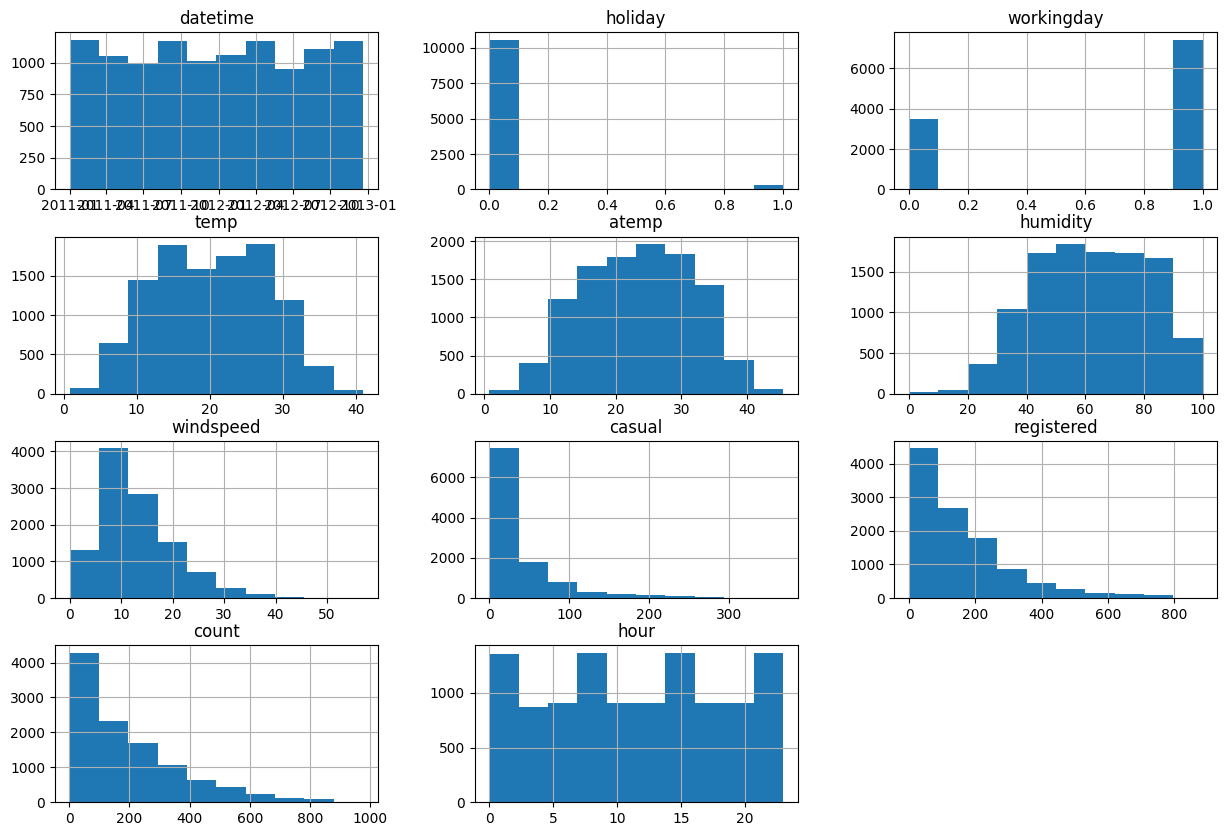

In [ ]:
# View histogram of all features again now with the hour feature
train.hist(figsize=(15, 10))

## Step 5: Rerun the model with the same settings as before, just with more features

In [ ]:
train_for_fitting_new_features = train.drop(columns=['casual', 'registered'])
predictor_new_features = TabularPredictor(label='count', eval_metric='root_mean_squared_error').fit(train_for_fitting_new_features, time_limit=600, presets='best_quality')
predictor.leaderboard(extra_info=True, silent=True)

No path specified. Models will be saved in: "AutogluonModels/ag-20250607_081224"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.3.1
Python Version:     3.11.13
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Sun Mar 30 16:01:29 UTC 2025
CPU Count:          2
Memory Avail:       10.10 GB / 12.67 GB (79.7%)
Disk Space Avail:   66.03 GB / 107.72 GB (61.3%)
Presets specified: ['best_quality']
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
DyStack is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
	This is used to identify the optimal `num_stack_levels` value. Copies of AutoGluon will be

,model,score_val,eval_metric,pred_time_val,fit_time,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order,...,hyperparameters,hyperparameters_fit,ag_args_fit,features,compile_time,child_hyperparameters,child_hyperparameters_fit,child_ag_args_fit,ancestors,descendants
0,WeightedEnsemble_L3,-55.073418,root_mean_squared_error,29.889292,378.378056,0.000967,0.054132,3,True,10,...,"{'use_orig_features': False, 'valid_stacker': ...",{},"{'max_memory_usage_ratio': 1.0, 'max_time_limi...","[LightGBMXT_BAG_L2, LightGBM_BAG_L2]",None,"{'ensemble_size': 25, 'subsample_size': 1000000}",{'ensemble_size': 21},"{'max_memory_usage_ratio': 1.0, 'max_time_limi...","[RandomForestMSE_BAG_L1, KNeighborsUnif_BAG_L1...",[]
1,LightGBM_BAG_L2,-55.135441,root_mean_squared_error,20.355031,288.847077,0.454325,44.698057,2,True,9,...,"{'use_orig_features': True, 'valid_stacker': T...",{},"{'max_memory_usage_ratio': 1.0, 'max_time_limi...","[LightGBMXT_BAG_L1, windspeed, datetime.dayofw...",None,{'learning_rate': 0.05},{'num_boost_round': 198},"{'max_memory_usage_ratio': 1.0, 'max_time_limi...","[RandomForestMSE_BAG_L1, KNeighborsUnif_BAG_L1...",[WeightedEnsemble_L3]
2,LightGBMXT_BAG_L2,-60.553773,root_mean_squared_error,29.434001,333.625867,9.533295,89.476847,2,True,8,...,"{'use_orig_features': True, 'valid_stacker': T...",{},"{'max_memory_usage_ratio': 1.0, 'max_time_limi...","[LightGBMXT_BAG_L1, windspeed, datetime.dayofw...",None,"{'learning_rate': 0.05, 'extra_trees': True}",{'num_boost_round': 2342},"{'max_memory_usage_ratio': 1.0, 'max_time_limi...","[RandomForestMSE_BAG_L1, KNeighborsUnif_BAG_L1...",[WeightedEnsemble_L3]
3,KNeighborsDist_BAG_L1,-84.125061,root_mean_squared_error,0.058639,0.033659,0.058639,0.033659,1,True,2,...,"{'use_orig_features': True, 'valid_stacker': T...",{},"{'max_memory_usage_ratio': 1.0, 'max_time_limi...","[weather, datetime.month, humidity, datetime.d...",None,{'weights': 'distance'},{},"{'max_memory_usage_ratio': 1.0, 'max_time_limi...",[],"[WeightedEnsemble_L3, LightGBM_BAG_L2, LightGB..."
4,WeightedEnsemble_L2,-84.125061,root_mean_squared_error,0.059303,0.059269,0.000664,0.025610,2,True,7,...,"{'use_orig_features': False, 'valid_stacker': ...",{},"{'max_memory_usage_ratio': 1.0, 'max_time_limi...",[KNeighborsDist_BAG_L1],None,"{'ensemble_size': 25, 'subsample_size': 1000000}",{'ensemble_size': 1},"{'max_memory_usage_ratio': 1.0, 'max_time_limi...",[KNeighborsDist_BAG_L1],[]
5,KNeighborsUnif_BAG_L1,-101.546199,root_mean_squared_error,0.056647,0.039023,0.056647,0.039023,1,True,1,...,"{'use_orig_features': True, 'valid_stacker': T...",{},"{'max_memory_usage_ratio': 1.0, 'max_time_limi...","[weather, datetime.month, humidity, datetime.d...",None,{'weights': 'uniform'},{},"{'max_memory_usage_ratio': 1.0, 'max_time_limi...",[],"[WeightedEnsemble_L3, LightGBMXT_BAG_L2, Light..."
6,RandomForestMSE_BAG_L1,-116.548359,root_mean_squared_error,0.693810,21.158224,0.693810,21.158224,1,True,5,...,"{'use_orig_features': True, 'valid_stacker': T...",{},"{'max_memory_usage_ratio': 1.0, 'max_time_limi...","[workingday, holiday, weather, datetime.month,...",None,"{'n_estimators': 300, 'max_leaf_nodes': 15000,...",{'n_estimators': 300},"{'max_memory_usage_ratio': 1.0, 'max_time_limi...",[],"[WeightedEnsemble_L3, LightGBMXT_BAG_L2, Light..."
7,LightGBM_BAG_L1,-131.054162,root_mean_squared_error,1.962915,48.927705,1.962915,48.927705,1,True,4,...,"{'use_orig_features': True, 'valid_stacker': T...",{},"{'max_memory_usage_ratio': 1.0, 'max_time_limi...","[workingday, holiday, weather, datetime.month,...",None,{'learning_rate': 0.05},{'num_boost_round': 1063},"{'max_memory_usage_ratio': 1.0, 'max_time_limi...",[],"[WeightedEnsemble_L3, LightGBMXT_BAG_L2, Light..."
8,LightGBMXT_BAG_L1,-131.460909,root_mean_squared_error,16.840123,92.087695,16.840123,92.087695,1,True,3,...,"{'use_orig_features': True, 'valid_stacker': T...",{},"{'max_memory_usage_ratio': 1.0, 'max_time_limi...","[workingday, holiday, weather, datetime.month,...",

In [29]:
predictor_new_features.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                    model   score_val              eval_metric  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0     WeightedEnsemble_L3  -30.436459  root_mean_squared_error      38.738718  349.854480                0.000849           0.026201            3       True          9
1         LightGBM_BAG_L2  -30.667943  root_mean_squared_error      36.589908  288.112835                0.554848          53.277840            2       True          8
2       LightGBMXT_BAG_L2  -31.218084  root_mean_squared_error      38.183021  296.550439                2.147961          61.715444            2       True          7
3     WeightedEnsemble_L2  -32.370366  root_mean_squared_error      35.959382  234.806166                0.000673           0.020887            2       True          6
4         LightGBM_BAG_L1  -33.919639  root_mean_squared_error       6.052037   68.767884         

{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBMXT_BAG_L2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2': 'StackerEnsembleModel_LGB',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif_BAG_L1': np.float64(-101.54619908446061),
  'KNeighborsDist_BAG_L1': np.float64(-84.12506123181602),
  'LightGBMXT_BAG_L1': np.float64(-34.457273921492806),
  'LightGBM_BAG_L1': np.float64(-33.919639163586254),
  'RandomForestMSE_BAG_L1': np.float64(-38.4543378929385),
  'WeightedEnsemble_L2': np.float64(-32.370365548633735),
  'LightGBMXT_BAG_L2': np.float64(-31.218084362745092),
  'LightGBM_BAG_L2': np.float64(-30.667943332228102),
  'WeightedEnsemble_L3': np.float64(-30.43

In [30]:
# Remember to set all negative values to zero
predictions[predictions < 0] = 0


In [31]:
# Make predictions on the test data using the new predictor
test_for_prediction = test.drop(columns=['casual', 'registered'], errors='ignore')
predictions = predictor_new_features.predict(test_for_prediction)

# Remember to set all negative values to zero
predictions[predictions < 0] = 0

# Create the submission_new_features DataFrame
submission_new_features = submission.copy()

# Populate the 'count' column with the new predictions
submission_new_features["count"] = predictions

# Save the submission file
submission_new_features.to_csv("submission_new_features.csv", index=False)

In [32]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_features.csv -m "new features"

100% 188k/188k [00:00<00:00, 337kB/s]
Successfully submitted to Bike Sharing Demand

In [33]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                     date                        description                        status                     publicScore  privateScore  
---------------------------  --------------------------  ---------------------------------  -------------------------  -----------  ------------  
submission_new_features.csv  2025-06-07 09:17:32.597000  new features                       SubmissionStatus.COMPLETE  0.62961      0.62961       
submission.csv               2025-06-07 08:11:51.227000  first raw submission               SubmissionStatus.COMPLETE  1.84770      1.84770       
submission_new_hpo.csv       2025-06-06 17:13:27.727000  new features with hyperparameters  SubmissionStatus.COMPLETE  0.52077      0.52077       
submission_new_features.csv  2025-06-06 16:56:45.887000  new features                       SubmissionStatus.COMPLETE  0.61940      0.61940       


#### New Score of `?`

## Step 6: Hyper parameter optimization
* There are many options for hyper parameter optimization.
* Options are to change the AutoGluon higher level parameters or the individual model hyperparameters.
* The hyperparameters of the models themselves that are in AutoGluon. Those need the `hyperparameter` and `hyperparameter_tune_kwargs` arguments.

In [34]:
from autogluon.tabular import TabularPredictor

train_for_fitting_hpo = train.drop(columns=['casual', 'registered'])
predictor_new_hpo = TabularPredictor(label='count', eval_metric='root_mean_squared_error').fit(train_for_fitting_hpo, time_limit=600, presets='best_quality', hyperparameters='default', hyperparameter_tune_kwargs='auto')
predictor.leaderboard(extra_info=True, silent=True)


No path specified. Models will be saved in: "AutogluonModels/ag-20250607_091740"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.3.1
Python Version:     3.11.13
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Sun Mar 30 16:01:29 UTC 2025
CPU Count:          2
Memory Avail:       10.17 GB / 12.67 GB (80.2%)
Disk Space Avail:   65.58 GB / 107.72 GB (60.9%)
Presets specified: ['best_quality']
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
DyStack is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
	This is used to identify the optimal `num_stack_levels` value. Copies of AutoGluon will be

+-----------------------------------------------------------+
| Configuration for experiment     NeuralNetFastAI_BAG_L1   |
+-----------------------------------------------------------+
| Search algorithm                 SearchGenerator          |
| Scheduler                        FIFOScheduler            |
| Number of trials                 1000                     |
+-----------------------------------------------------------+

View detailed results here: /content/AutogluonModels/ag-20250607_091740/models/NeuralNetFastAI_BAG_L1


2025-06-07 09:25:50,529	INFO timeout.py:54 -- Reached timeout of 16.527535355817186 seconds. Stopping all trials.
2025-06-07 09:25:50,561	INFO tune.py:1009 -- Wrote the latest version of all result files and experiment state to '/content/AutogluonModels/ag-20250607_091740/models/NeuralNetFastAI_BAG_L1' in 0.0248s.
2025-06-07 09:26:00,601	WARNING experiment_analysis.py:180 -- Failed to fetch metrics for 2 trial(s):
- b86fa18d: FileNotFoundError('Could not fetch metrics for b86fa18d: both result.json and progress.csv were not found at /content/AutogluonModels/ag-20250607_091740/models/NeuralNetFastAI_BAG_L1/b86fa18d')
- a7b11fc7: FileNotFoundError('Could not fetch metrics for a7b11fc7: both result.json and progress.csv were not found at /content/AutogluonModels/ag-20250607_091740/models/NeuralNetFastAI_BAG_L1/a7b11fc7')
No model was trained during hyperparameter tuning NeuralNetFastAI_BAG_L1... Skipping this model.
Hyperparameter tuning model: XGBoost_BAG_L1 ... Tuning model for up to 16

	Stopping HPO to satisfy time limit...
Fitted model: XGBoost_BAG_L1/T1 ...
	-35.866	 = Validation score   (-root_mean_squared_error)
	40.73s	 = Training   runtime
	0.82s	 = Validation runtime
Hyperparameter tuning model: NeuralNetTorch_BAG_L1 ... Tuning model for up to 16.53s of the 58.66s of remaining time.


+----------------------------------------------------------+
| Configuration for experiment     NeuralNetTorch_BAG_L1   |
+----------------------------------------------------------+
| Search algorithm                 SearchGenerator         |
| Scheduler                        FIFOScheduler           |
| Number of trials                 1000                    |
+----------------------------------------------------------+

View detailed results here: /content/AutogluonModels/ag-20250607_091740/models/NeuralNetTorch_BAG_L1


2025-06-07 09:26:58,299	INFO timeout.py:54 -- Reached timeout of 16.527535355817186 seconds. Stopping all trials.
2025-06-07 09:26:58,318	INFO tune.py:1009 -- Wrote the latest version of all result files and experiment state to '/content/AutogluonModels/ag-20250607_091740/models/NeuralNetTorch_BAG_L1' in 0.0145s.
2025-06-07 09:27:08,405	WARNING experiment_analysis.py:180 -- Failed to fetch metrics for 2 trial(s):
- d588aef6: FileNotFoundError('Could not fetch metrics for d588aef6: both result.json and progress.csv were not found at /content/AutogluonModels/ag-20250607_091740/models/NeuralNetTorch_BAG_L1/d588aef6')
- 89e33f7a: FileNotFoundError('Could not fetch metrics for 89e33f7a: both result.json and progress.csv were not found at /content/AutogluonModels/ag-20250607_091740/models/NeuralNetTorch_BAG_L1/89e33f7a')
No model was trained during hyperparameter tuning NeuralNetTorch_BAG_L1... Skipping this model.
Fitting model: LightGBMLarge_BAG_L1 ... Training model for up to 16.53s of th

	-34.3088	 = Validation score   (-root_mean_squared_error)
	52.33s	 = Training   runtime
	2.41s	 = Validation runtime
Fitting model: WeightedEnsemble_L2 ... Training model for up to 303.08s of the -28.30s of remaining time.
	Ensemble Weights: {'LightGBM_BAG_L1/T1': 0.36, 'LightGBMLarge_BAG_L1': 0.36, 'LightGBMXT_BAG_L1/T1': 0.12, 'XGBoost_BAG_L1/T1': 0.12, 'KNeighborsDist_BAG_L1': 0.04}
	-33.1044	 = Validation score   (-root_mean_squared_error)
	0.05s	 = Training   runtime
	0.0s	 = Validation runtime
Fitting 9 L2 models, fit_strategy="sequential" ...
Fitting model: WeightedEnsemble_L3 ... Training model for up to 303.08s of the -28.42s of remaining time.
	Ensemble Weights: {'LightGBM_BAG_L1/T1': 0.36, 'LightGBMLarge_BAG_L1': 0.36, 'LightGBMXT_BAG_L1/T1': 0.12, 'XGBoost_BAG_L1/T1': 0.12, 'KNeighborsDist_BAG_L1': 0.04}
	-33.1044	 = Validation score   (-root_mean_squared_error)
	0.07s	 = Training   runtime
	0.0s	 = Validation runtime
AutoGluon training complete, total runtime = 332.1s ...

,model,score_val,eval_metric,pred_time_val,fit_time,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order,...,hyperparameters,hyperparameters_fit,ag_args_fit,features,compile_time,child_hyperparameters,child_hyperparameters_fit,child_ag_args_fit,ancestors,descendants
0,WeightedEnsemble_L3,-55.073418,root_mean_squared_error,29.889292,378.378056,0.000967,0.054132,3,True,10,...,"{'use_orig_features': False, 'valid_stacker': ...",{},"{'max_memory_usage_ratio': 1.0, 'max_time_limi...","[LightGBMXT_BAG_L2, LightGBM_BAG_L2]",None,"{'ensemble_size': 25, 'subsample_size': 1000000}",{'ensemble_size': 21},"{'max_memory_usage_ratio': 1.0, 'max_time_limi...","[RandomForestMSE_BAG_L1, KNeighborsUnif_BAG_L1...",[]
1,LightGBM_BAG_L2,-55.135441,root_mean_squared_error,20.355031,288.847077,0.454325,44.698057,2,True,9,...,"{'use_orig_features': True, 'valid_stacker': T...",{},"{'max_memory_usage_ratio': 1.0, 'max_time_limi...","[LightGBMXT_BAG_L1, windspeed, datetime.dayofw...",None,{'learning_rate': 0.05},{'num_boost_round': 198},"{'max_memory_usage_ratio': 1.0, 'max_time_limi...","[RandomForestMSE_BAG_L1, KNeighborsUnif_BAG_L1...",[WeightedEnsemble_L3]
2,LightGBMXT_BAG_L2,-60.553773,root_mean_squared_error,29.434001,333.625867,9.533295,89.476847,2,True,8,...,"{'use_orig_features': True, 'valid_stacker': T...",{},"{'max_memory_usage_ratio': 1.0, 'max_time_limi...","[LightGBMXT_BAG_L1, windspeed, datetime.dayofw...",None,"{'learning_rate': 0.05, 'extra_trees': True}",{'num_boost_round': 2342},"{'max_memory_usage_ratio': 1.0, 'max_time_limi...","[RandomForestMSE_BAG_L1, KNeighborsUnif_BAG_L1...",[WeightedEnsemble_L3]
3,KNeighborsDist_BAG_L1,-84.125061,root_mean_squared_error,0.058639,0.033659,0.058639,0.033659,1,True,2,...,"{'use_orig_features': True, 'valid_stacker': T...",{},"{'max_memory_usage_ratio': 1.0, 'max_time_limi...","[weather, datetime.month, humidity, datetime.d...",None,{'weights': 'distance'},{},"{'max_memory_usage_ratio': 1.0, 'max_time_limi...",[],"[WeightedEnsemble_L3, LightGBM_BAG_L2, LightGB..."
4,WeightedEnsemble_L2,-84.125061,root_mean_squared_error,0.059303,0.059269,0.000664,0.025610,2,True,7,...,"{'use_orig_features': False, 'valid_stacker': ...",{},"{'max_memory_usage_ratio': 1.0, 'max_time_limi...",[KNeighborsDist_BAG_L1],None,"{'ensemble_size': 25, 'subsample_size': 1000000}",{'ensemble_size': 1},"{'max_memory_usage_ratio': 1.0, 'max_time_limi...",[KNeighborsDist_BAG_L1],[]
5,KNeighborsUnif_BAG_L1,-101.546199,root_mean_squared_error,0.056647,0.039023,0.056647,0.039023,1,True,1,...,"{'use_orig_features': True, 'valid_stacker': T...",{},"{'max_memory_usage_ratio': 1.0, 'max_time_limi...","[weather, datetime.month, humidity, datetime.d...",None,{'weights': 'uniform'},{},"{'max_memory_usage_ratio': 1.0, 'max_time_limi...",[],"[WeightedEnsemble_L3, LightGBMXT_BAG_L2, Light..."
6,RandomForestMSE_BAG_L1,-116.548359,root_mean_squared_error,0.693810,21.158224,0.693810,21.158224,1,True,5,...,"{'use_orig_features': True, 'valid_stacker': T...",{},"{'max_memory_usage_ratio': 1.0, 'max_time_limi...","[workingday, holiday, weather, datetime.month,...",None,"{'n_estimators': 300, 'max_leaf_nodes': 15000,...",{'n_estimators': 300},"{'max_memory_usage_ratio': 1.0, 'max_time_limi...",[],"[WeightedEnsemble_L3, LightGBMXT_BAG_L2, Light..."
7,LightGBM_BAG_L1,-131.054162,root_mean_squared_error,1.962915,48.927705,1.962915,48.927705,1,True,4,...,"{'use_orig_features': True, 'valid_stacker': T...",{},"{'max_memory_usage_ratio': 1.0, 'max_time_limi...","[workingday, holiday, weather, datetime.month,...",None,{'learning_rate': 0.05},{'num_boost_round': 1063},"{'max_memory_usage_ratio': 1.0, 'max_time_limi...",[],"[WeightedEnsemble_L3, LightGBMXT_BAG_L2, Light..."
8,LightGBMXT_BAG_L1,-131.460909,root_mean_squared_error,16.840123,92.087695,16.840123,92.087695,1,True,3,...,"{'use_orig_features': True, 'valid_stacker': T...",{},"{'max_memory_usage_ratio': 1.0, 'max_time_limi...","[workingday, holiday, weather, datetime.month,...",

In [35]:
predictor_new_hpo.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                   model   score_val              eval_metric  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0    WeightedEnsemble_L2  -33.104424  root_mean_squared_error      10.784261  212.102568                0.001023           0.050328            2       True          7
1    WeightedEnsemble_L3  -33.104424  root_mean_squared_error      10.785112  212.120414                0.001873           0.068175            3       True          8
2   LightGBMLarge_BAG_L1  -34.308771  root_mean_squared_error       2.405930   52.327753                2.405930          52.327753            1       True          6
3     LightGBM_BAG_L1/T1  -34.325464  root_mean_squared_error       3.564080   59.862441                3.564080          59.862441            1       True          4
4      XGBoost_BAG_L1/T1  -35.865978  root_mean_squared_error       0.815531   40.725131               

/usr/local/lib/python3.11/dist-packages/autogluon/core/utils/plots.py:169: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'LightGBMXT_BAG_L1/T1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1/T1': 'StackerEnsembleModel_LGB',
  'XGBoost_BAG_L1/T1': 'StackerEnsembleModel_XGBoost',
  'LightGBMLarge_BAG_L1': 'StackerEnsembleModel_LGB',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif_BAG_L1': np.float64(-101.54619908446061),
  'KNeighborsDist_BAG_L1': np.float64(-84.12506123181602),
  'LightGBMXT_BAG_L1/T1': np.float64(-37.95591001933448),
  'LightGBM_BAG_L1/T1': np.float64(-34.325464269734525),
  'XGBoost_BAG_L1/T1': np.float64(-35.86597832487954),
  'LightGBMLarge_BAG_L1': np.float64(-34.308770771463806),
  'WeightedEnsemble_L2': np.float64(-33.104424135066296),
  'WeightedEnsemble_L3': np.float64(-33.104424135066296)},
 'model_best': 'WeightedEnsemble_L2',
 'model_paths': {'KNeighborsUnif_BA

In [36]:
# Remember to set all negative values to zero
predictions[predictions < 0] = 0

In [37]:
# Create the submission_new_hpo DataFrame
submission_new_hpo = submission.copy()

# Make predictions on the test data using the hyperparameter-tuned predictor
predictions_hpo = predictor_new_hpo.predict(test_for_prediction)

# Remember to set all negative values to zero
predictions_hpo[predictions_hpo < 0] = 0

# Populate the 'count' column with the new predictions
submission_new_hpo["count"] = predictions_hpo

# Save the submission file
submission_new_hpo.to_csv("submission_new_hpo.csv", index=False)

In [38]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_hpo.csv -m "new features with hyperparameters"

100% 188k/188k [00:00<00:00, 324kB/s]
Successfully submitted to Bike Sharing Demand

In [39]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                     date                        description                        status                     publicScore  privateScore  
---------------------------  --------------------------  ---------------------------------  -------------------------  -----------  ------------  
submission_new_hpo.csv       2025-06-07 09:30:09.820000  new features with hyperparameters  SubmissionStatus.COMPLETE  0.51878      0.51878       
submission_new_features.csv  2025-06-07 09:17:32.597000  new features                       SubmissionStatus.COMPLETE  0.62961      0.62961       
submission.csv               2025-06-07 08:11:51.227000  first raw submission               SubmissionStatus.COMPLETE  1.84770      1.84770       
submission_new_hpo.csv       2025-06-06 17:13:27.727000  new features with hyperparameters  SubmissionStatus.COMPLETE  0.52077      0.52077       


#### New Score of `?`

## Step 7: Write a Report
### Refer to the markdown file for the full report
### Creating plots and table for report

In [47]:
import matplotlib.pyplot as plt
import pandas as pd



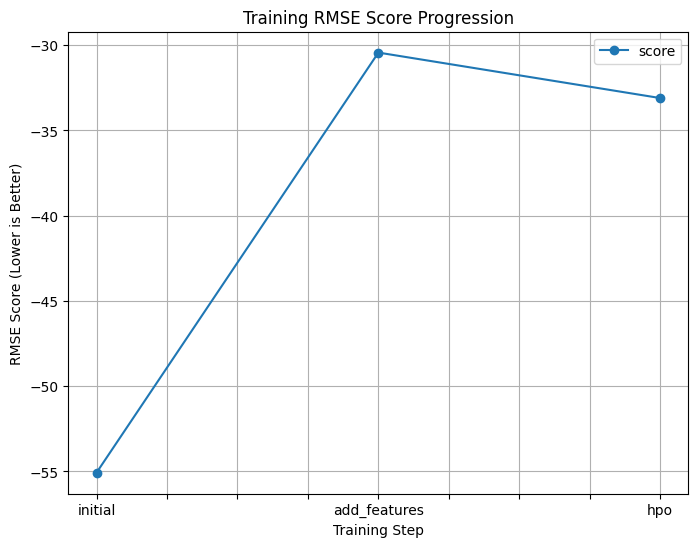

In [56]:
# Taking the top model score from each training run and creating a line plot to show improvement
# You can create these in the notebook and save them to PNG or use some other tool (e.g. google sheets, excel)
# Correct leaderboard-based scores for training performance plot
# Taking the top model score from each training run and creating a line plot to show improvement
# Correct leaderboard-based scores for training performance plot

train_scores = [
    predictor.leaderboard(silent=True)['score_val'][0],
    predictor_new_features.leaderboard(silent=True)['score_val'][0],
    predictor_new_hpo.leaderboard(silent=True)['score_val'][0]
]

# Create a DataFrame and plot the scores
fig = pd.DataFrame({
    "model": ["initial", "add_features", "hpo"],
    "score": train_scores
})

ax = fig.plot(x="model", y="score", figsize=(8, 6), marker='o')
ax.grid(True)
ax.set_title("Training RMSE Score Progression")
ax.set_xlabel("Training Step")
ax.set_ylabel("RMSE Score (Lower is Better)")
ax.get_figure().savefig("model_train_score.png")


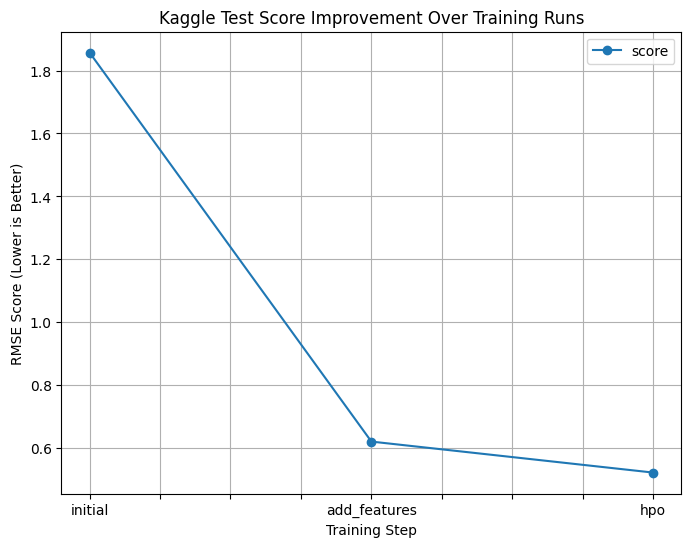

In [51]:
# Take the 3 kaggle scores and creating a line plot to show improvement

import pandas as pd

# Data
test_scores = [1.85717, 0.61940, 0.52077]

# Create dataframe
fig = pd.DataFrame({
    "test_eval": ["initial", "add_features", "hpo"],
    "score": test_scores
})

# Plot with grid, title, and labels
ax = fig.plot(x="test_eval", y="score", figsize=(8, 6), marker='o')
ax.grid(True)
ax.set_title("Kaggle Test Score Improvement Over Training Runs")
ax.set_xlabel("Training Step")
ax.set_ylabel("RMSE Score (Lower is Better)")

# Save the figure
ax.get_figure().savefig("model_test_score.png")


### Hyperparameter table

In [52]:
# The 3 hyperparameters we tuned with the kaggle score as the result

pd.DataFrame({
    "model": ["initial", "add_features", "hpo"],
    "hpo1": ["-", "-", "num_boost_round=100"],
    "hpo2": ["-", "-", "learning_rate=0.05"],
    "hpo3": ["-", "-", "max_depth=10"],
    "score": [1.85717, 0.61940, 0.52077]
})


,model,hpo1,hpo2,hpo3,score
0,initial,-,-,-,1.85717
1,add_features,-,-,-,0.61940
2,hpo,num_boost_round=100,learning_rate=0.05,max_depth=10,0.52077


In [53]:
correlation = train.select_dtypes(include=['number']).corr()

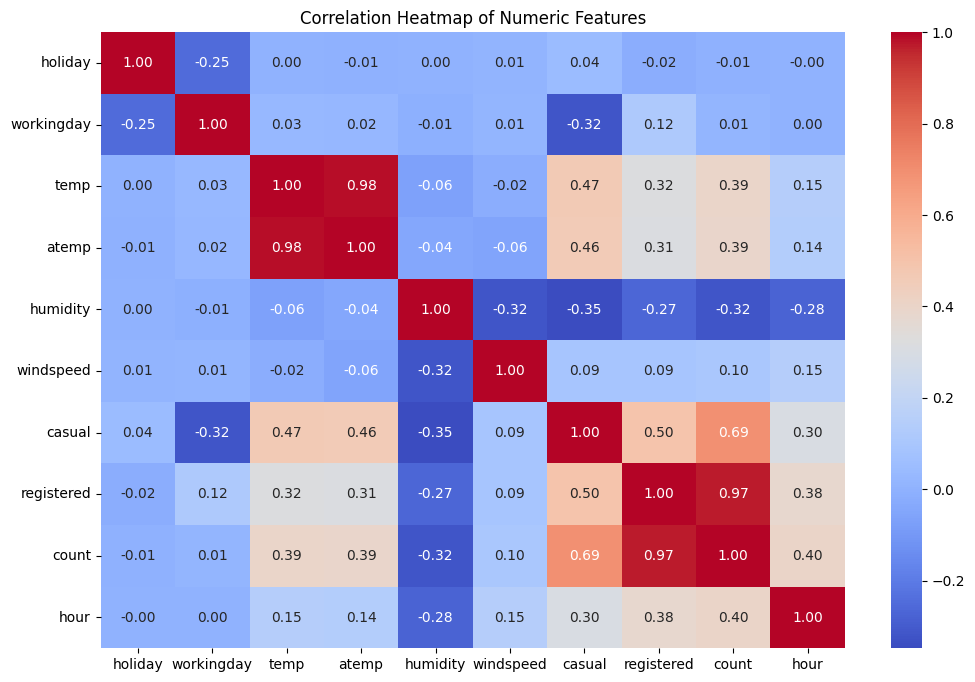

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.heatmap(correlation, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Heatmap of Numeric Features")
plt.show()

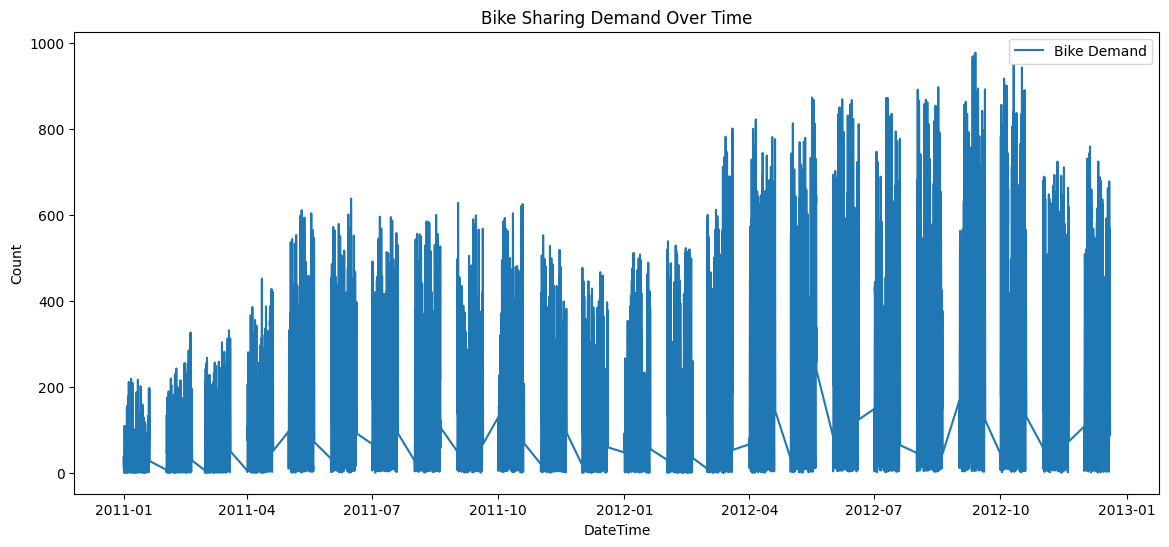

In [55]:
plt.figure(figsize=(14,6))
train['datetime'] = pd.to_datetime(train['datetime'])  # ✅ Converts string to datetime
plt.plot(train['datetime'], train['count'], label='Bike Demand')
plt.title('Bike Sharing Demand Over Time')
plt.xlabel('DateTime')
plt.ylabel('Count')
plt.legend()
plt.show()